# 2024 Guide Session 4주차 실습

In [4]:
'''1'''
# 필요한 라이브러리를 불러오기
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Jupyter Notebook에서 그래프가 바로 보이도록 설정
%matplotlib inline

# ignore warnings - 필요없는 경고 메시지 표시 X
import warnings
warnings.filterwarnings('ignore')

In [5]:
'''2'''
# 데이터 파일을 불러오기
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [6]:
'''3'''
# train data > 칼럼별로 결측치 비율 확인
for col in df_train.columns:
    msg = 'column: {:>10}\t percent of NaN value: {:.2f}%'.format(col, 100 * (df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)

column: PassengerId	 percent of NaN value: 0.00%
column:   Survived	 percent of NaN value: 0.00%
column:     Pclass	 percent of NaN value: 0.00%
column:       Name	 percent of NaN value: 0.00%
column:        Sex	 percent of NaN value: 0.00%
column:        Age	 percent of NaN value: 19.87%
column:      SibSp	 percent of NaN value: 0.00%
column:      Parch	 percent of NaN value: 0.00%
column:     Ticket	 percent of NaN value: 0.00%
column:       Fare	 percent of NaN value: 0.00%
column:      Cabin	 percent of NaN value: 77.10%
column:   Embarked	 percent of NaN value: 0.22%


In [7]:
'''4'''
# test data > 칼럼별로 결측치 비율 확인
for col in df_test.columns:
    msg = 'column: {:>10}\t percent of NaN value: {:.2f}%'.format(col, 100 * (df_test[col].isnull().sum() / df_test[col].shape[0]))
    print(msg)

column: PassengerId	 percent of NaN value: 0.00%
column:     Pclass	 percent of NaN value: 0.00%
column:       Name	 percent of NaN value: 0.00%
column:        Sex	 percent of NaN value: 0.00%
column:        Age	 percent of NaN value: 20.57%
column:      SibSp	 percent of NaN value: 0.00%
column:      Parch	 percent of NaN value: 0.00%
column:     Ticket	 percent of NaN value: 0.00%
column:       Fare	 percent of NaN value: 0.24%
column:      Cabin	 percent of NaN value: 78.23%
column:   Embarked	 percent of NaN value: 0.00%


<span style = "color:red"> 
Q1. 결측치가 있는 칼럼 중, 삭제하는 방식으로 결측치를 처리해야 할 칼럼은 어떤 것인가요?

In [8]:
'''5'''
### 답
# Cabin 칼럼.

'5'

## Column별 전처리 및 시각화

### - 4주차 column: Pclass / Age / Embarked / Fare / Ticket / Cabin

#### 1. Pclass: 티켓 클래스 (1 = 1st, 2 = 2nd, 3 = 3rd)

In [9]:
'''6'''
# Pclass는 순서형, 카테고리 형 데이터 타입이다.
df_train['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [10]:
'''7'''
# Pclass 별 생존자의 인원 분포
df_train[['Pclass', 'Survived']].groupby(['Pclass']).sum()

,Survived
Pclass,
1,136
2,87
3,119


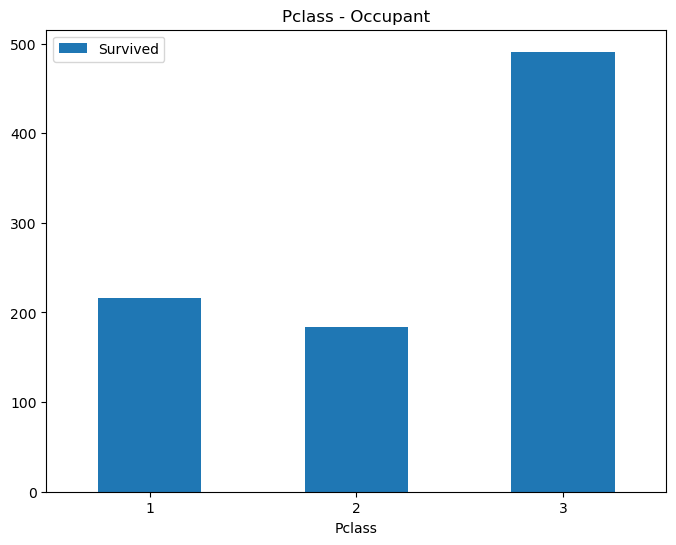

In [11]:
'''8'''
# 탑승자 분포 확인 
fig, ax = plt.subplots(1, 1, figsize=(8, 6))  # 1행 1열의 서브플롯 설정
bar1 = df_train[['Pclass', 'Survived']].groupby(['Pclass']).count().plot.bar(ax=ax)
bar1.set_title('Pclass - Occupant')
plt.xticks(rotation=0)
plt.show()

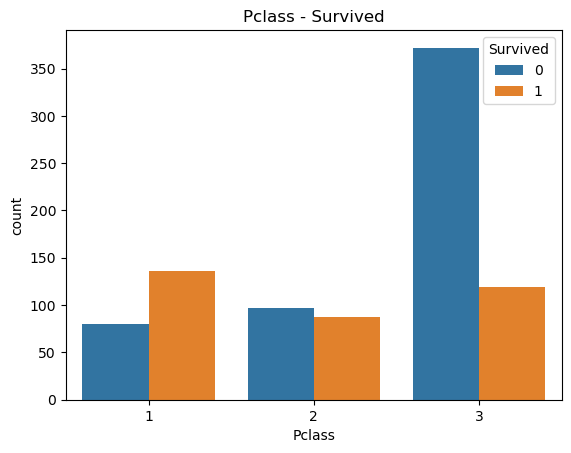

In [12]:
'''9'''
# pclass 별 생존자
bar2 = sns.countplot(hue='Survived', x='Pclass', data=df_train)
bar2.set_title('Pclass - Survived')
plt.show()

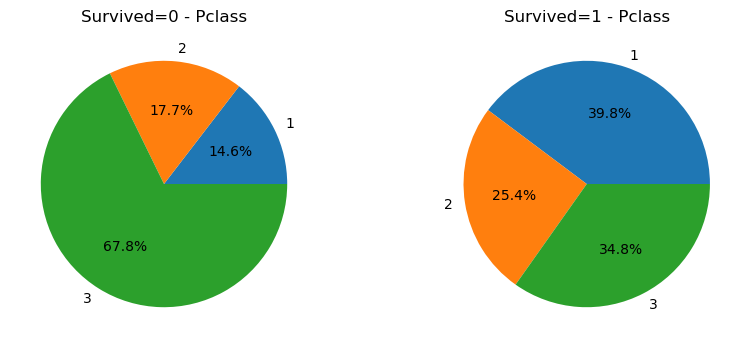

In [13]:
'''10'''
fig, ax = plt.subplots(1,2,figsize=(10,4))
 
# Survived 가 0인 데이터를 이용한 Pie Plot
df_train[df_train['Survived'] == 0]['Pclass'].value_counts().sort_index().plot.pie(ax=ax[0], autopct='%1.1f%%')
ax[0].set(ylabel='', title='Survived=0 - Pclass')
 
# Survived 가 1인 데이터를 이용한 Pie Plot
df_train[df_train['Survived'] == 1]['Pclass'].value_counts().sort_index().plot.pie(ax=ax[1], autopct='%1.1f%%')
ax[1].set(ylabel='', title='Survived=1 - Pclass')
 
plt.show()

In [14]:
'''11'''
# 생존율
survival_rate = df_train.groupby('Pclass')['Survived'].mean().reset_index()  
survival_rate

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


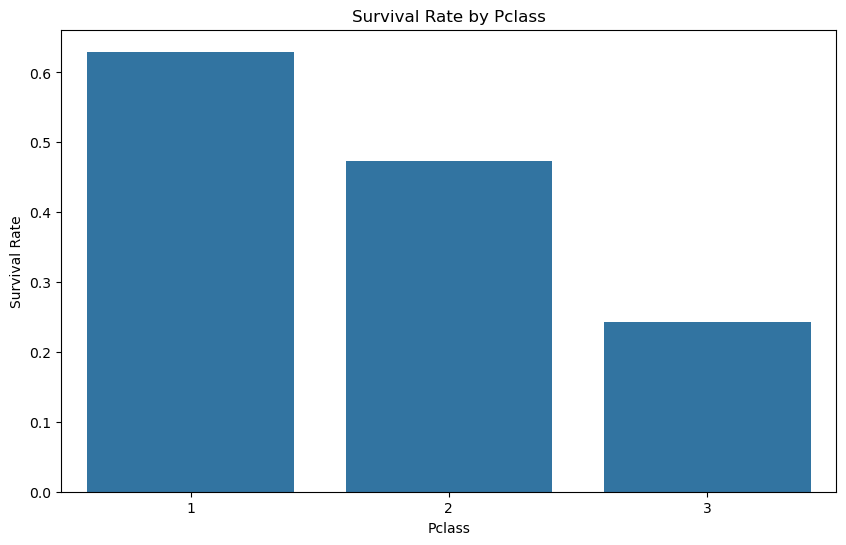

In [15]:
'''12'''
# 객실 등급(Pclass)에 따른 생존율
plt.figure(figsize=(10, 6))
sns.barplot(x='Pclass', y='Survived', data=survival_rate)
plt.title('Survival Rate by Pclass')
plt.ylabel('Survival Rate')
plt.xlabel('Pclass')
plt.show()

<span style = "color:red"> 
Q2. Pclass와 생존율 사이에 이러한 관계가 나타나는 이유를 추론해보세요.

In [16]:
'''13'''
### 답
# Pclass 별 위치, 구조 순서, 안전시설의 차이. (높은 등급일수록)

'13'

#### 2. Age: 나이(세)
#### - train data, test data 결측치 有

In [17]:
'''14'''
df_train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [18]:
'''15'''
# 결측치 처리 (수치형 데이터)

# 평균으로 대체
df_train['Age'].fillna(df_train['Age'].mean(), inplace=True)
df_test['Age'].fillna(df_test['Age'].mean(), inplace=True)

# (2) 중앙값으로 대체
# df_train['Age'].fillna(df_train['Age'].median(), inplace=True)
# df_test['Age'].fillna(df_test['Age'].median(), inplace=True)

In [19]:
'''16'''
# 정수형으로 변환
df_train["Age"] = df_train["Age"].astype(int) 
df_test[ "Age"] = df_test["Age"].astype(int)

<span style = "color:red"> 
Q3. Age 칼럼에 정수형 변환을 적용하는 이유는 무엇일까요?

In [20]:
'''17'''
### 답
# 측정의 편리성을 위해 나이를 소수로 표현할 이유가 없기 때문

'17'

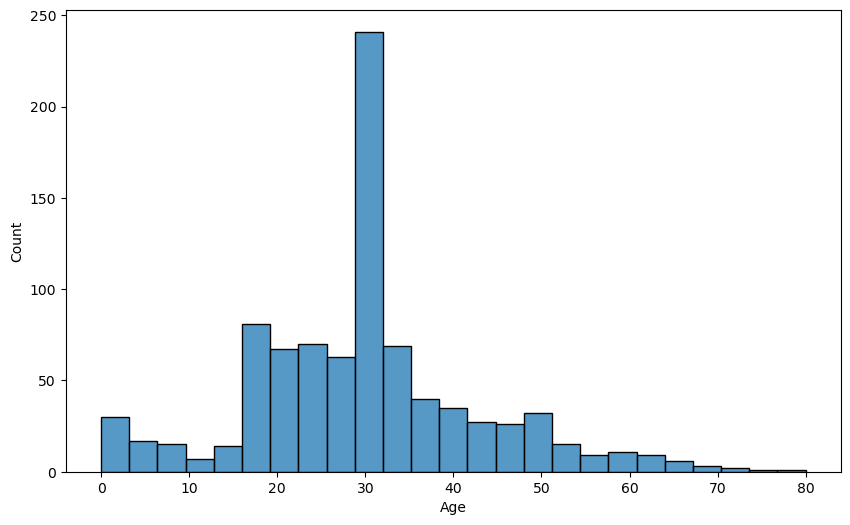

In [21]:
'''18'''
# Age histogram
fig, ax = plt.subplots(figsize=(10,6))
sns.histplot(df_train['Age'], bins=25, ax=ax)
plt.show()

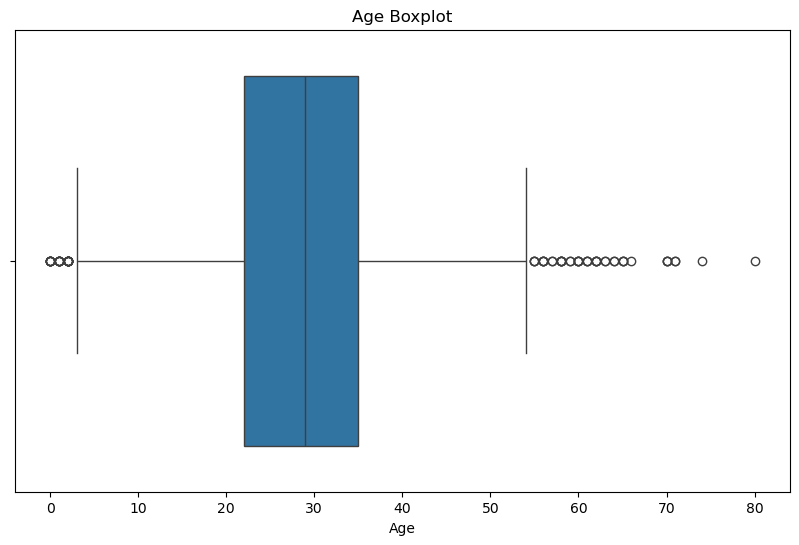

In [22]:
'''19'''
# Age boxplot
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x=df_train['Age'], ax=ax)
ax.set_title('Age Boxplot')
plt.show()

In [23]:
'''20'''
# Age(나이)에 따른 생존율

# 생존율을 입력받을 list 생성
age_range_survival_ratio = []

# 1살부터 생존율 구하기
for i in range(1, 80):  # 1살부터 79살까지 반복

    # i살 미만의 사람들을 필터링
    age_group = df_train[df_train['Age'] < i]
    
    # 해당 나이대의 생존자 수와 전체 인원 수를 구합니다.
    survived_count = age_group['Survived'].sum()
    total_count = len(age_group)
    
    # 생존율 계산 (0으로 나누는 것을 방지하기 위해 조건 추가)
    if total_count > 0:
        survival_ratio = survived_count / total_count  # 전체 인원 중 생존 인원의 비율
    else:
        survival_ratio = 0
    
    # 리스트에 생존율 추가
    age_range_survival_ratio.append(survival_ratio)


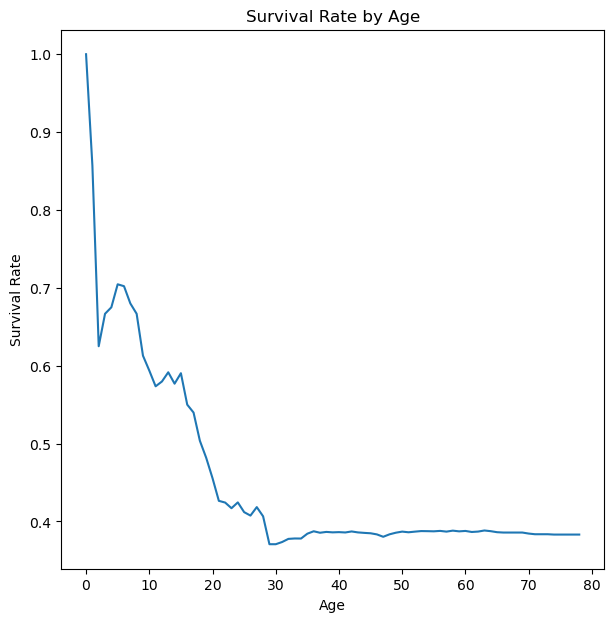

In [24]:
'''21'''
plt.figure(figsize=(7,7))
plt.plot(age_range_survival_ratio)
plt.title('Survival Rate by Age')
plt.ylabel('Survival Rate')
plt.xlabel('Age')
 
plt.show()

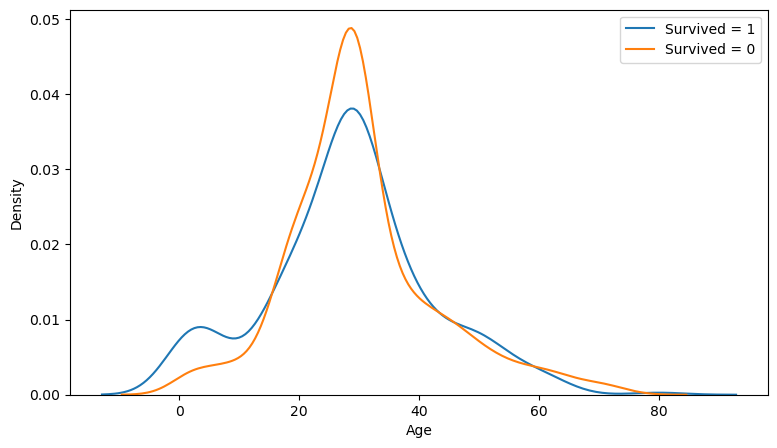

In [25]:
'''22'''
# 생존여부에 따른 Age 분포의 KDE
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived = 1', 'Survived = 0'])
plt.show()

<span style = "color:red"> 
Q4. 위의 그래프 결과를 바탕으로 생존자와 비생존자의 나이 분포를 비교해 보세요.

In [26]:
'''23'''
### 답
# 탑승 비율에 비해 어린이가 많이 생존했고, 탑승 비율에 비해 20~40대가 생존율이 낮다. 40~80은 통계적으로 유의미한 관계를 찾기 어려워보인다.

'23'

#### 3. Embarked: 탑승 항구
#### - train data 결측치 有 

In [27]:
'''24'''
df_train['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [28]:
'''25'''
# 결측치 처리 (범주형 데이터)

# 최빈값으로 대체
most_frequent_embarked = df_train['Embarked'].mode()[0]
df_train['Embarked'].fillna(most_frequent_embarked, inplace=True)

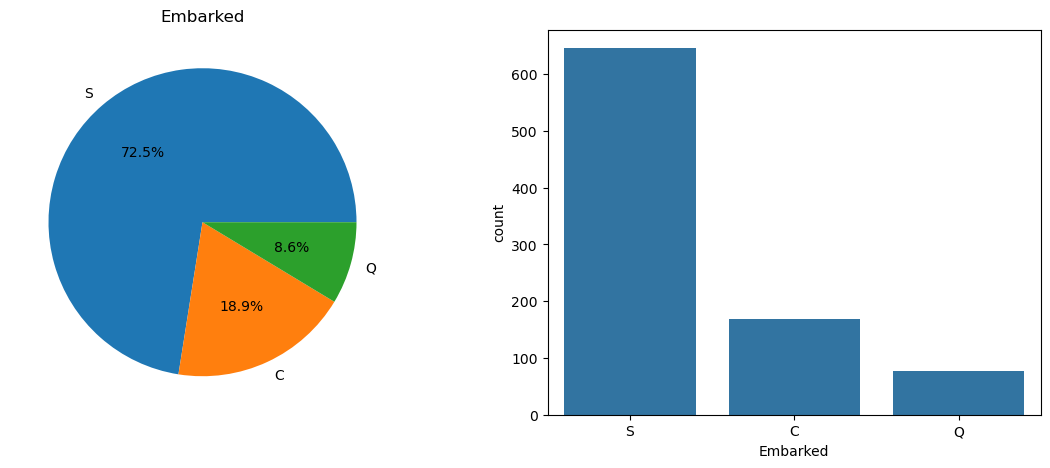

In [29]:
'''26'''
# Embarked의 데이터 분포
fig, ax = plt.subplots(1,2,figsize=(14,5))
df_train['Embarked'].value_counts().plot.pie(ax=ax[0], autopct='%1.1f%%')
ax[0].set(title='Embarked', ylabel='')
sns.countplot(data=df_train, x='Embarked', ax=ax[1])
plt.show()

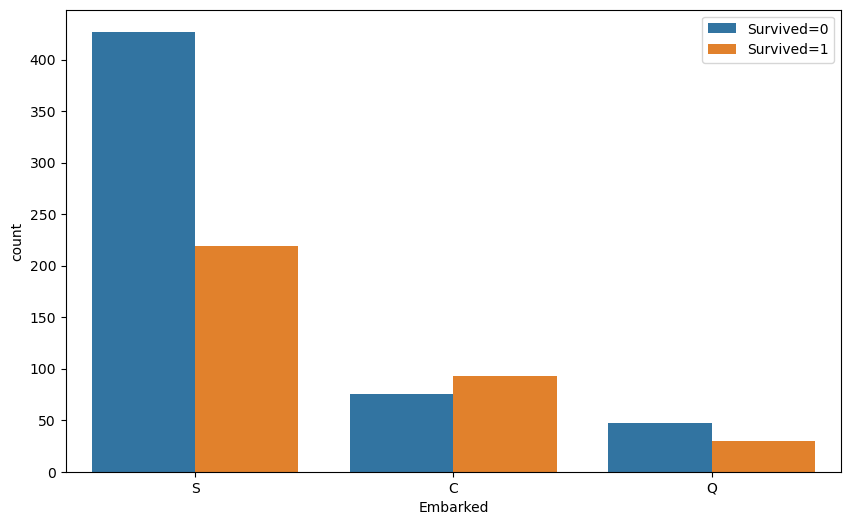

In [30]:
'''27'''
fig, ax = plt.subplots(figsize=(10,6))
 
sns.countplot(data=df_train, x='Embarked', hue='Survived', ax=ax)
 
labels=['Survived=0', 'Survived=1']
ax.legend(labels=labels)
 
plt.show()

In [31]:
'''28'''
# Embarked에 따른 생존율
survival_rate = df_train.groupby('Embarked')['Survived'].mean().reset_index()  
survival_rate

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


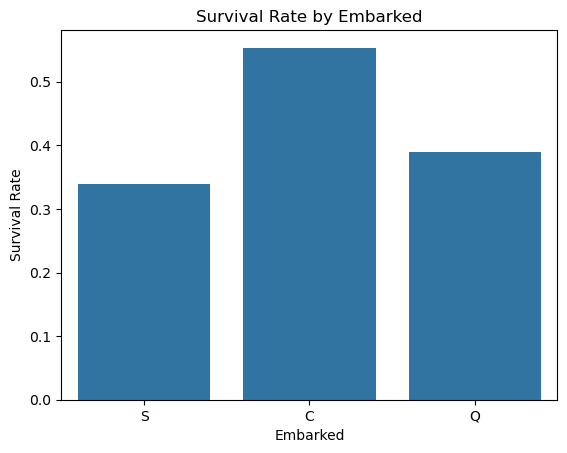

In [32]:
'''29'''
# 항구 종류에 따른 생존율
sns.barplot(x='Embarked', y='Survived', data=df_train, ci=None)
plt.title('Survival Rate by Embarked')
plt.xlabel('Embarked')
plt.ylabel('Survival Rate')
plt.show()

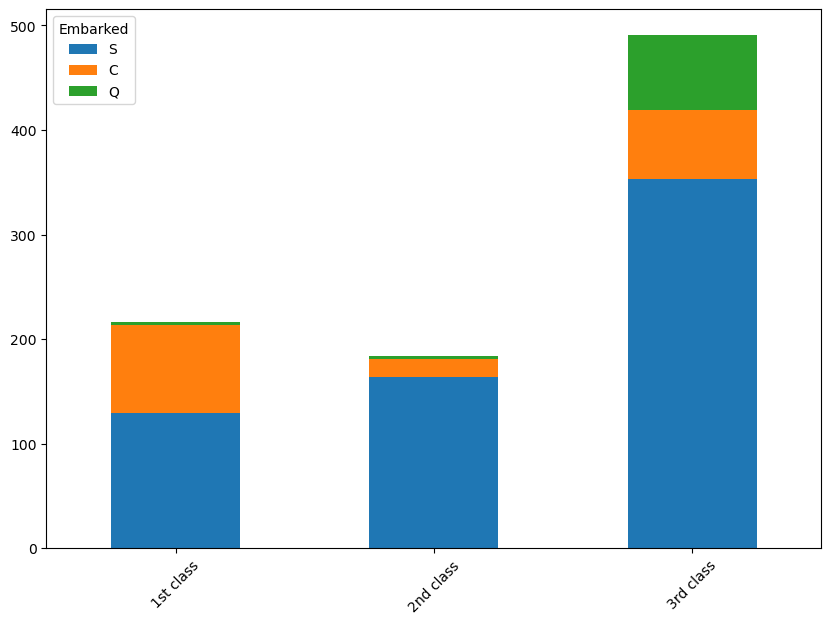

In [33]:
'''30'''
# Pclass 별로 데이터 분리 
Pclass1 = df_train[df_train['Pclass']==1]['Embarked'].value_counts()
Pclass2 = df_train[df_train['Pclass']==2]['Embarked'].value_counts()
Pclass3 = df_train[df_train['Pclass']==3]['Embarked'].value_counts()

fig, ax = plt.subplots(figsize=(10,7))
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class','3rd class']
df.plot(kind='bar', stacked=True, ax=ax)
 
# xlabel 회전
plt.xticks(rotation=45)
plt.show()

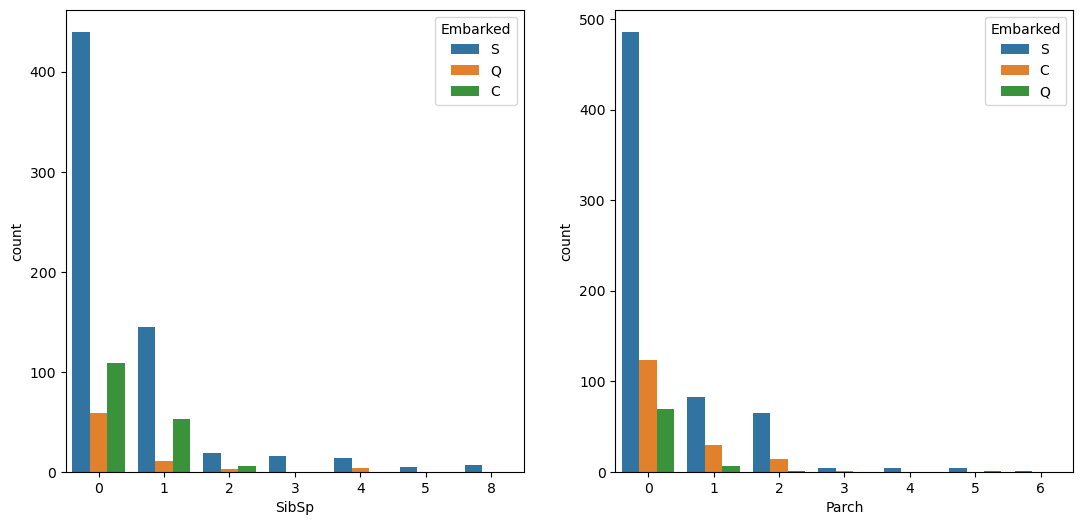

In [34]:
'''31'''
# SibSp, Parch(동승자 유무)와도 연관이 있을까?
fig, ax = plt.subplots(1,2,figsize=(13,6))
 
sns.countplot(data=df_train, x='SibSp', hue='Embarked', ax=ax[0])
sns.countplot(data=df_train, x='Parch', hue='Embarked', ax=ax[1])
 
plt.show()

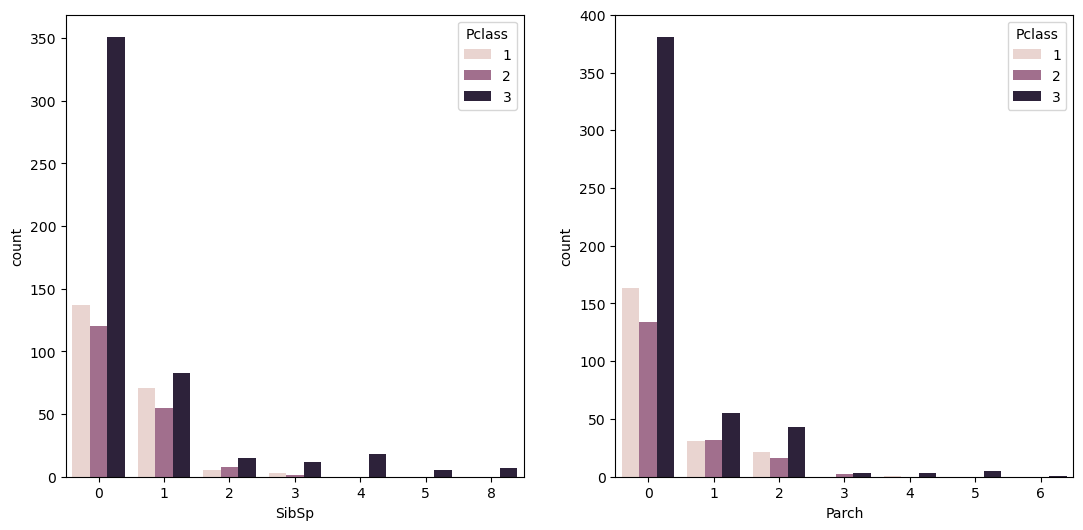

In [35]:
'''32'''
# 혼자 탄 사람이 Class 3에도 많을까?
fig, ax = plt.subplots(1,2,figsize=(13,6))
sns.countplot(data=df_train, x='SibSp', hue='Pclass', ax=ax[0])
sns.countplot(data=df_train, x='Parch', hue='Pclass', ax=ax[1])
plt.show()

# S항구에서 혼자 Class3에 탄 탑승객의 생존율이 낮다..ㅠㅠ

<span style = "color:red"> 
Q5. 위의 그래프 결과를 바탕으로 Embarked(탑승항구)/Pclass(티켓 클래스)/SibSp, Parch(동승자 유무)를 생존율과 연관 지어 해석해 보세요.

In [36]:
'''33'''
### 답
# S항구에서 타고 티켓 클래스가 낮고 동승자가 적을수록 생존율이 낮다. 반대로 C항구에서 티켓 클래스가 높고 동승자가 많을수록 생존율이 높다.
# S항구의 경우 혼자서, 티켓 클래스가 3인 경우가 많아서 생존율이 낮았다.

'33'

#### 4. Fare: 탑승 요금 
#### - test data 결측치 有 

In [37]:
'''34'''
df_train['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [38]:
'''35'''
# 결측치 처리 (수치형 데이터)

# 중앙값으로 대체
df_test['Fare'].fillna(df_test['Fare'].median(), inplace=True)

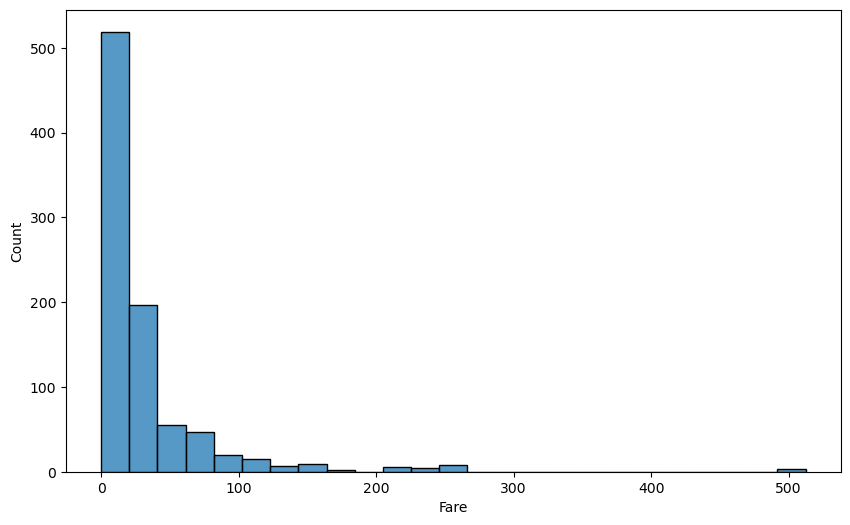

In [39]:
'''36'''
# Fare histogram
fig, ax = plt.subplots(figsize=(10,6))
sns.histplot(df_train['Fare'], bins=25, ax=ax)
plt.show()

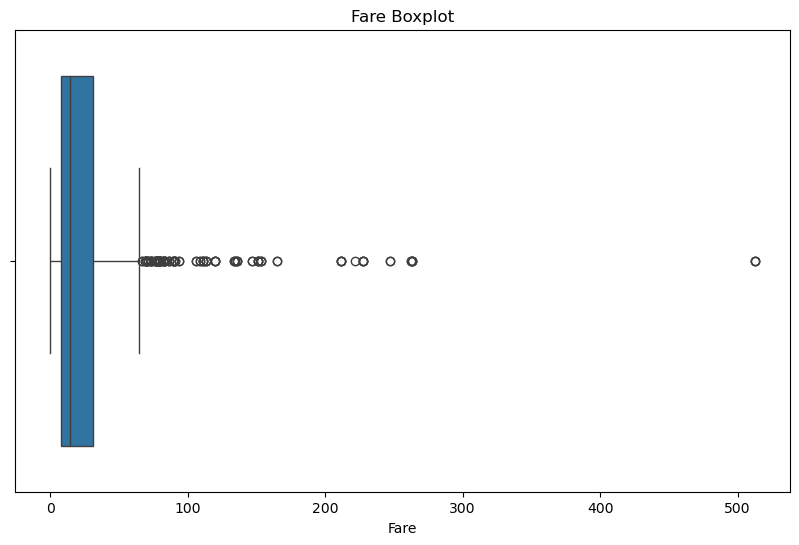

In [40]:
'''37'''
# Fare boxplot
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x=df_train['Fare'], ax=ax)
ax.set_title('Fare Boxplot')
plt.show()
# 세로선은 각각 최소, 평균, 최대이고 오른쪽 땡땡이들은 이상치들이다.

In [41]:
'''38'''
# 이상치 처리 

# 1사분위수(Q1)와 3사분위수(Q3)를 계산
Q1_fare = df_train['Fare'].quantile(0.25)
Q3_fare = df_train['Fare'].quantile(0.75)

# IQR (Interquartile Range) 계산
IQR_fare = Q3_fare - Q1_fare

# 이상치 경계를 설정
lower_bound = Q1_fare - 1.5 * IQR_fare
upper_bound = Q3_fare + 1.5 * IQR_fare

# 이상치를 상한선과 하한선으로 대체
df_train['Fare'] = df_train['Fare'].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))
df_test['Fare'] = df_test['Fare'].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))

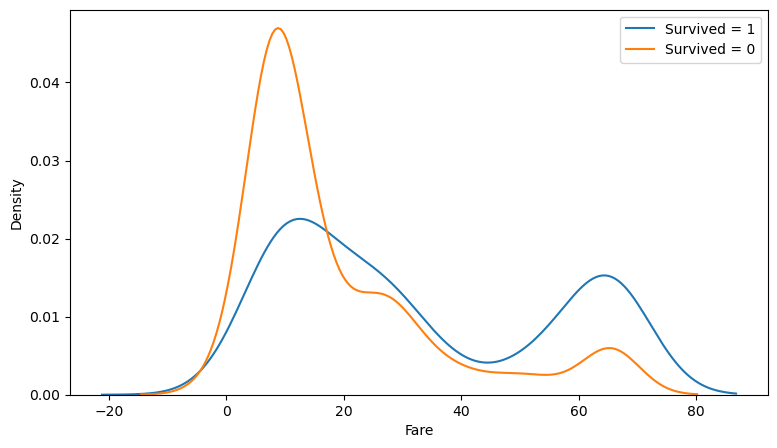

In [42]:
'''39'''
# 생존 여부에 따른 Fare 분포의 KDE
# 생존자와 비생존자의 요금 분포를 비교해 볼 수 있다.
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Fare'], ax=ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Fare'], ax=ax)
plt.legend(['Survived = 1', 'Survived = 0'])
plt.show()

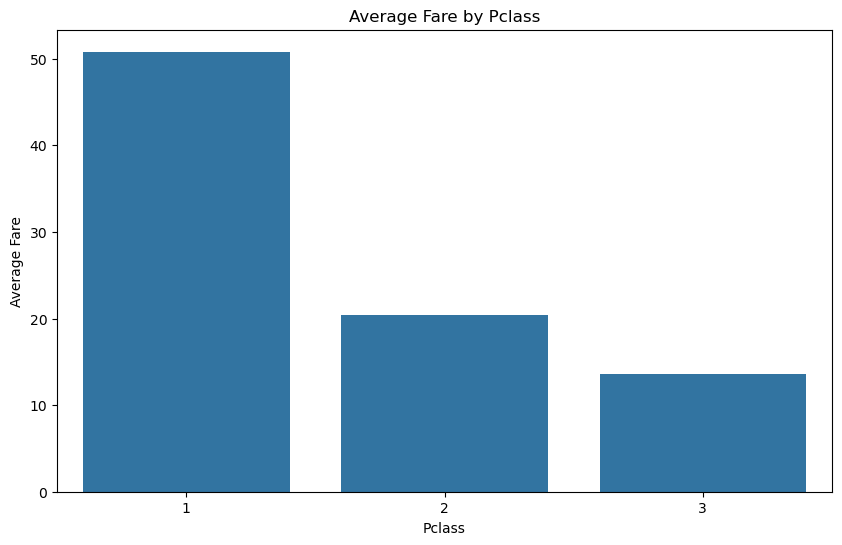

In [43]:
'''40'''
# Pclass(등급)별 Fare(요금) 평균 확인
train_fare_means = df_train.groupby('Pclass')['Fare'].mean().reset_index()

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='Pclass', y='Fare', data=train_fare_means)
plt.title('Average Fare by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Average Fare')
plt.show()

#### 5. Cabin: 객실 넘버
#### - train data, test data 결측치 有 

In [44]:
'''41'''
# 결측치 비율이 70% 이상이므로 칼럼 제거
df_train = df_train.drop(columns=['Cabin'])
df_test = df_test.drop(columns=['Cabin'])

#### 6. Ticket: 티켓 넘버

In [45]:
'''42'''
df_train['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [46]:
'''43'''
df_train['Ticket'].value_counts()

Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64

<span style = "color:red"> 
Q6. 위의 결과를 바탕으로 데이터셋에서 어떤 사실을 알 수 있는지 고르시오.<br>
<span style = "color:black"> 
(1) 모든 승객은 서로 다른 티켓을 소지하고 있다.<br>
(2) 동일한 티켓을 소지한 승객이 존재한다.<br>
(3) 모든 티켓은 한 번씩만 출현한다.<br>
(4) 티켓 번호는 승객의 나이를 나타낸다.
</span>

In [47]:
'''44'''
### 답
# 2

'44'

In [48]:
'''45'''
df_train.to_csv('df_train_4.csv', index = False)
df_test.to_csv('df_test_4.csv', index = False)